# **MC-321 ML :** ASSIGNMENT 6
### **DHARMESH KOTA**
**202203038**

**Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# **Question 1**

Perform binary classification using logistic regression on the data in the file Social Network Ads.csv, which is a categorical dataset. The goal is to determine whether a user purchased a product or not using three features.


## **TASK 1:**
Visualize the data by 3D plotting features using different colors for label 0 and 1

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df = df.drop(columns=["User ID"], errors="ignore")

df = df.dropna().reset_index(drop=True)
print(df)

     Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]


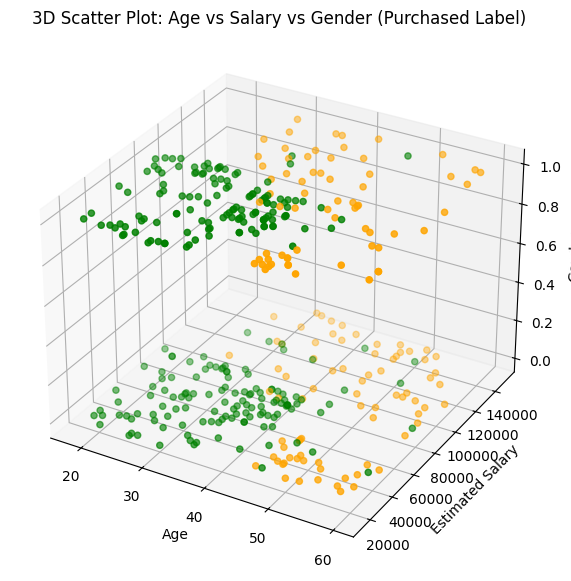

In [ ]:
colors = df["Purchased"].map({0: "green", 1: "orange"})

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df["Age"], df["EstimatedSalary"], df["Gender"], c=colors)
ax.set_xlabel("Age")
ax.set_ylabel("Estimated Salary")
ax.set_zlabel("Gender")
ax.set_title("3D Scatter Plot: Age vs Salary vs Gender (Purchased Label)")
plt.show()

## **TASK 2**
Implement the logistic function and learn the model parameters using:
- Stochastic gradient descent method.
- Gradient descent with momentum and Regularization.
- Newton’s method (iteratively reweighted least squares method) and Regularization. Does the IRLS
method converge in fewer iterations than GD?
- Do a performance comparison between gradient descent with momentum and Newton’s method.

epoch 0, cost: 0.4568
epoch 100, cost: 0.3456
epoch 200, cost: 0.3458
epoch 300, cost: 0.3453
epoch 400, cost: 0.3465
epoch 500, cost: 0.3455
epoch 600, cost: 0.3453
epoch 700, cost: 0.3477
epoch 800, cost: 0.3463
epoch 900, cost: 0.3459


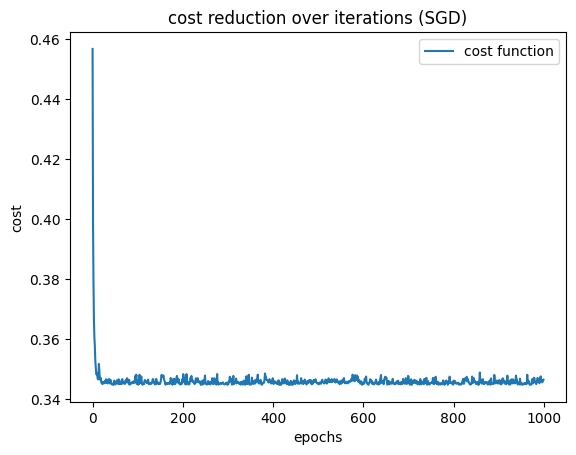

final model parameters: [-1.12929262  0.14182748  2.74053099  1.28808319]


In [ ]:
X = df[["Gender", "Age", "EstimatedSalary"]].values
y = df["Purchased"].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X = np.c_[np.ones(X.shape[0]), X]

theta = np.zeros(X.shape[1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def stochastic_gradient_descent(X, y, theta, alpha=0.01, epochs=1000):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        for i in range(m):
            index = np.random.randint(0, m)
            xi = X[index, :].reshape(1, -1)
            yi = y[index]

            prediction = sigmoid(np.dot(xi, theta))
            gradient = np.dot(xi.T, (prediction - yi))
            theta -= alpha * gradient.flatten()

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"epoch {epoch}, cost: {cost:.4f}")

    return theta, cost_history

alpha = 0.01
epochs = 1000
theta, cost_history = stochastic_gradient_descent(X, y, theta, alpha, epochs)

plt.plot(range(epochs), cost_history, label="cost function")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("cost reduction over iterations (SGD)")
plt.legend()
plt.show()

print("final model parameters:", theta)

(400, 4)
epoch 0, cost: 0.691751, cost change: inf
epoch 100, cost: 0.382720, cost change: 0.000513
epoch 200, cost: 0.358160, cost change: 0.000114
epoch 300, cost: 0.351176, cost change: 0.000041
epoch 400, cost: 0.348401, cost change: 0.000018
epoch 500, cost: 0.347127, cost change: 0.000009
epoch 600, cost: 0.346495, cost change: 0.000004
epoch 700, cost: 0.346165, cost change: 0.000002
epoch 800, cost: 0.345987, cost change: 0.000001
converged at epoch 845 with cost change: 0.000001


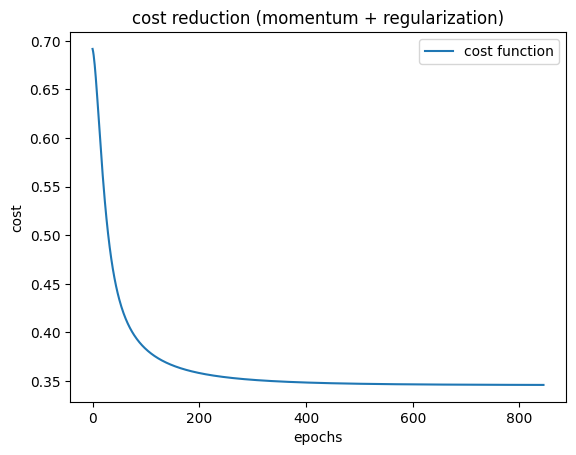

final model parameters: [-1.11084178  0.15216784  2.3627631   1.18337599]


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta, lambda_):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))

    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)

    return cost + reg_term

def gradient_descent_momentum_reg(X, y, theta, alpha=0.01, beta=0.9, lambda_=0.1, tol=1e-6, epochs=1000):
    m = len(y)

    v = np.zeros_like(theta)

    cost_history = []

    prev_cost = float('inf')

    for epoch in range(epochs):
        predictions = sigmoid(np.dot(X, theta))

        gradient = (1/m) * np.dot(X.T, (predictions - y)) + (lambda_ / m) * np.r_[0, theta[1:]]

        v = beta * v + (1 - beta) * gradient
        theta -= alpha * v

        cost = compute_cost(X, y, theta, lambda_)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"epoch {epoch}, cost: {cost:.6f}, cost change: {abs(prev_cost - cost):.6f}")

        if abs(prev_cost - cost) < tol:
            print(f"converged at epoch {epoch} with cost change: {abs(prev_cost - cost):.6f}")
            break

        prev_cost = cost

    plt.plot(range(len(cost_history)), cost_history, label="cost function")
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.title("cost reduction (momentum + regularization)")
    plt.legend()
    plt.show()

    return theta

print(X.shape)
theta = np.zeros(X.shape[1])

alpha = 0.1
beta = 0.9
lambda_ = 0.1
tol = 1e-6
epochs = 1000

theta_final = gradient_descent_momentum_reg(X, y, theta, alpha, beta, lambda_, tol, epochs)

print("final model parameters:", theta_final)

iteration 0, cost: 0.404533, cost change: inf
iteration 1, cost: 0.356278, cost change: 0.048256
iteration 2, cost: 0.346460, cost change: 0.009818
iteration 3, cost: 0.345766, cost change: 0.000694
iteration 4, cost: 0.345761, cost change: 0.000005
iteration 5, cost: 0.345761, cost change: 0.000000
converged at iteration 5 with cost change: 0.000000


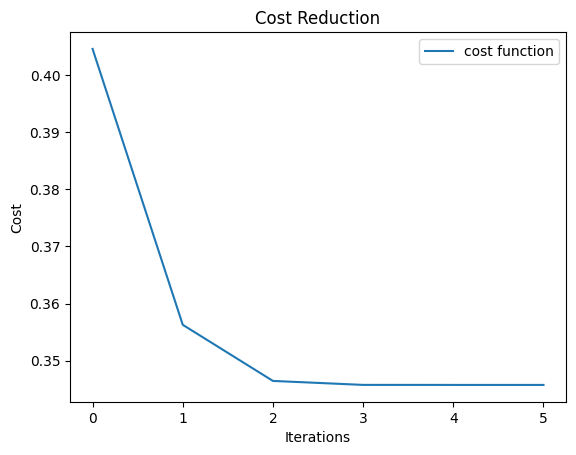

final model parameters: [-1.14886766  0.16448623  2.45904503  1.23010328]


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta, lambda_):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))

    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)

    return cost + reg_term

def newton_method_reg(X, y, theta, lambda_=0.1, tol=1e-6, max_iter=100):
    m, n = X.shape

    cost_history = []

    prev_cost = float('inf')

    for i in range(max_iter):
        predictions = sigmoid(np.dot(X, theta))

        gradient = (1/m) * np.dot(X.T, (predictions - y)) + (lambda_ / m) * np.r_[0, theta[1:]]

        R = np.diag(predictions * (1 - predictions))
        H = (1/m) * np.dot(X.T, np.dot(R, X)) + (lambda_ / m) * np.eye(n)

        H[0, 0] -= (lambda_ / m)

        theta -= np.linalg.inv(H).dot(gradient)

        cost = compute_cost(X, y, theta, lambda_)
        cost_history.append(cost)

        print(f"iteration {i}, cost: {cost:.6f}, cost change: {abs(prev_cost - cost):.6f}")

        if abs(prev_cost - cost) < tol:
            print(f"converged at iteration {i} with cost change: {abs(prev_cost - cost):.6f}")
            break

        prev_cost = cost

    plt.plot(range(len(cost_history)), cost_history, label="cost function")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Reduction")
    plt.legend()
    plt.show()

    return theta

theta = np.zeros(X.shape[1])

lambda_ = 0.1
tol = 1e-6
max_iter = 100

theta_final = newton_method_reg(X, y, theta, lambda_, tol, max_iter)

print("final model parameters:", theta_final)

### Newton's Method vs. Gradient Descent with Momentum

- **Newton's Method** achieves convergence much faster than **Gradient Descent with Momentum**, reaching the optimal solution in just **5 iterations**, whereas Gradient Descent requires **845 epochs**.

- Both approaches yield nearly the **same final cost (0.3457)**, demonstrating that their solutions are well-optimized.

- **Gradient Descent** progresses through gradual, incremental updates, whereas **Newton's Method** takes larger, more precise steps by leveraging second-order derivatives.

- **Computational Complexity:**
  - Newton's Method involves **matrix inversion**, leading to a time complexity of \( O(n^3) \), which can be computationally expensive for high-dimensional datasets.
  - Gradient Descent, though slower per iteration, scales more efficiently with large datasets, as each update has a complexity of **\( O(n) \)**.

## **TASK 3**
Plot the training data, test data, and decision boundary learnt by logistic regression in the same figure. (It should be a straight line showing the boundary separating the region where \( h_w(x) > 0.5 \) from the region  
where \( h_w(x) \leq 0.5 \) (\( h_w(x^{(i)}) = \sigma(w^T x^{(i)}) \)) )for the above three results. Use 90% data points from each set  
for training and the remaining 10% for testing the accuracy of classification.  

newton's method - train accuracy: 85.28%, test accuracy: 90.00%
gradient descent - train accuracy: 85.28%, test accuracy: 90.00%


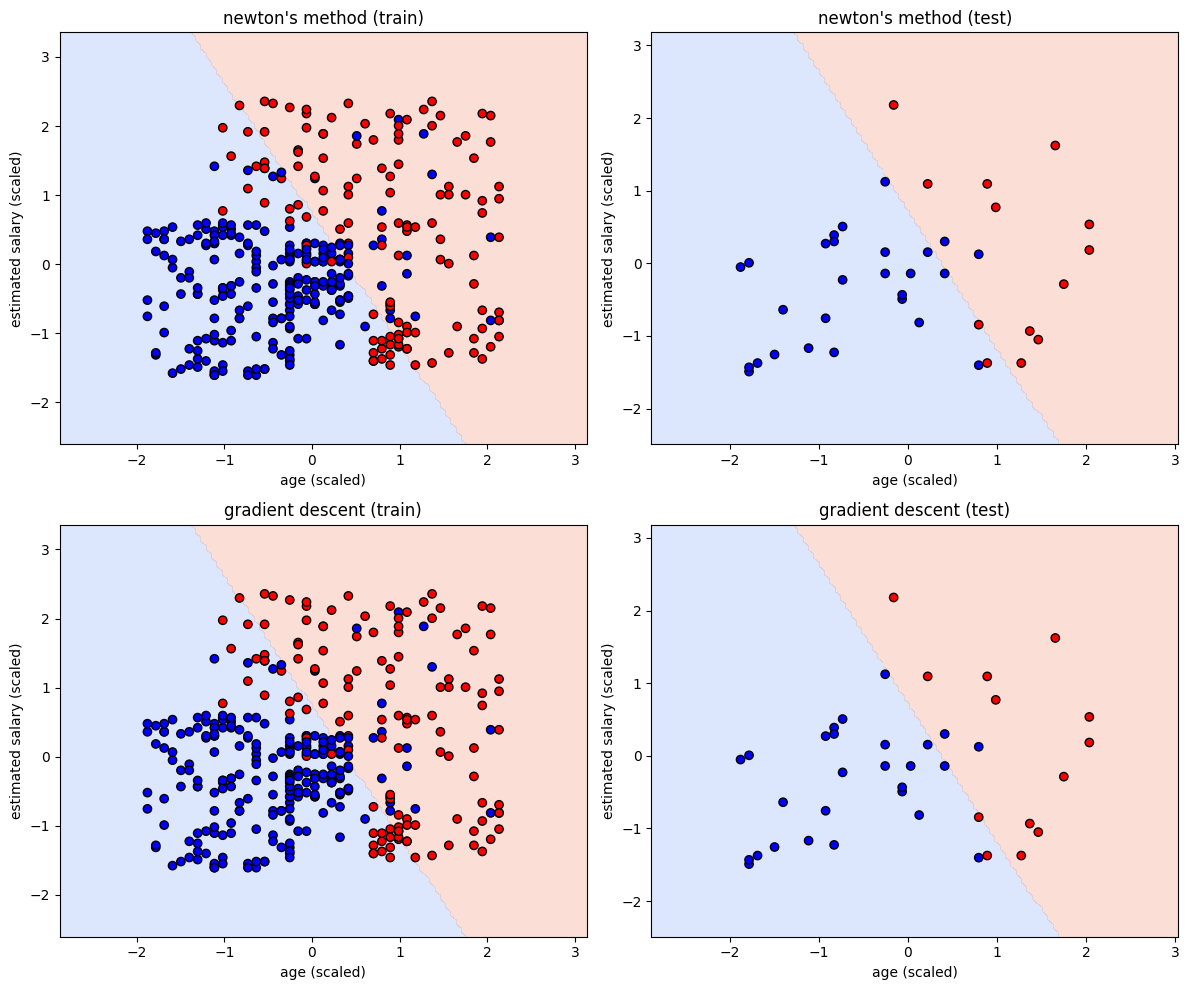

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')

df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

df = df.drop(columns=["User ID"], errors="ignore").dropna().reset_index(drop=True)

X = df[["Gender", "Age", "EstimatedSalary"]].values
y = df["Purchased"].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta, lambda_):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    return cost + reg_term

def newton_method_reg(X, y, theta, lambda_=0.1, max_iter=100):
    for _ in range(max_iter):
        predictions = sigmoid(np.dot(X, theta))
        gradient = (1 / len(y)) * np.dot(X.T, (predictions - y)) + (lambda_ / len(y)) * np.r_[0, theta[1:]]
        R = np.diag(predictions * (1 - predictions))
        H = (1 / len(y)) * np.dot(X.T, np.dot(R, X)) + (lambda_ / len(y)) * np.eye(X.shape[1])
        H[0, 0] -= (lambda_ / len(y))
        theta -= np.linalg.inv(H).dot(gradient)
    return theta

def gradient_descent_momentum_reg(X, y, theta, alpha=0.01, beta=0.9, lambda_=0.1, epochs=1000):
    v = np.zeros_like(theta)
    for _ in range(epochs):
        predictions = sigmoid(np.dot(X, theta))
        gradient = (1 / len(y)) * np.dot(X.T, (predictions - y)) + (lambda_ / len(y)) * np.r_[0, theta[1:]]
        v = beta * v + (1 - beta) * gradient
        theta -= alpha * v
    return theta

def plot_decision_boundary(X, y, theta, title, ax):
    x_min = X[:, 2].min() - 1
    x_max = X[:, 2].max() + 1
    y_min = X[:, 3].min() - 1
    y_max = X[:, 3].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    grid = np.c_[np.ones(xx.ravel().shape), np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    Z = sigmoid(np.dot(grid, theta))
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 2], X[:, 3], c=y, cmap='bwr', edgecolors='k')
    ax.set_xlabel("age (scaled)")
    ax.set_ylabel("estimated salary (scaled)")
    ax.set_title(title)

def predict(X, theta):
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

theta_init = np.zeros(X_train.shape[1])

theta_newton = newton_method_reg(X_train, y_train, theta_init)

theta_gd = gradient_descent_momentum_reg(X_train, y_train, theta_init)

train_acc_newton = np.mean(predict(X_train, theta_newton) == y_train) * 100
test_acc_newton = np.mean(predict(X_test, theta_newton) == y_test) * 100
train_acc_gd = np.mean(predict(X_train, theta_gd) == y_train) * 100
test_acc_gd = np.mean(predict(X_test, theta_gd) == y_test) * 100

print(f"newton's method - train accuracy: {train_acc_newton:.2f}%, test accuracy: {test_acc_newton:.2f}%")
print(f"gradient descent - train accuracy: {train_acc_gd:.2f}%, test accuracy: {test_acc_gd:.2f}%")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_decision_boundary(X_train, y_train, theta_newton, "newton's method (train)", axes[0, 0])
plot_decision_boundary(X_test, y_test, theta_newton, "newton's method (test)", axes[0, 1])
plot_decision_boundary(X_train, y_train, theta_gd, "gradient descent (train)", axes[1, 0])
plot_decision_boundary(X_test, y_test, theta_gd, "gradient descent (test)", axes[1, 1])
plt.tight_layout()
plt.show()

# **QUESTION 2**
Consider the Iris flower dataset that contains a set of 150 samples, which consists of 50 samples from each of three
species of Iris: setosa (label 0), versicolor (label 1), and virginica (label 2). Each sample was measured in four
features: sepal length, sepal width, petal length, and petal width.

**Data Preparation and Visualization:**

## **TASKS**
- Split the dataset into a balanced (with respect to the labels) training and test set, containing respectively
80% and 20% of the dataset.
- Visualize the data by 3D plotting features using different colors for label 0,1 and 2.
- Implement the logistic function and learn the model parameters using:
  - Stochastic gradient descent method.
  - Gradient descent with momentum and Regularization.
  - Newton's method (iteratively reweighted least squares method) and Regularization. Does the IRLS
method converge in fewer iterations than GD?
- Do a performance comparison between gradient descent with momentum and Newton's method

In [ ]:
df = pd.read_csv('Iris.csv')
df.columns = df.columns.str.strip()
df = df.iloc[:, 1:]

label_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
df["Species"] = df["Species"].map(label_mapping)

df = df.dropna().reset_index(drop=True)

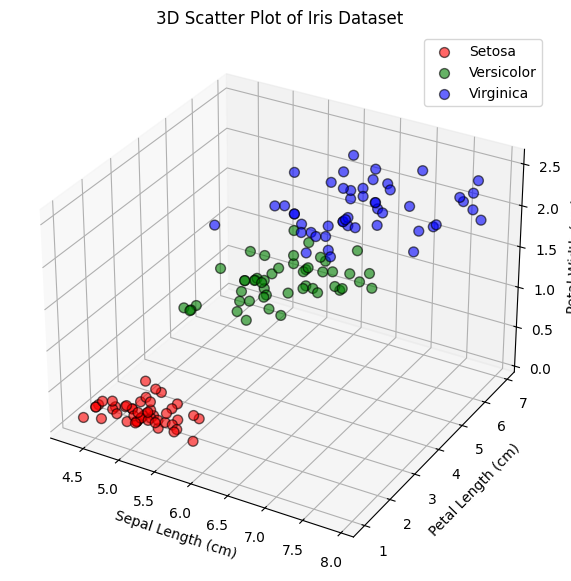

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']

for species, color, label in zip([0, 1, 2], colors, labels):
    subset = df[df["Species"] == species]
    ax.scatter(subset["SepalLengthCm"], subset["PetalLengthCm"], subset["PetalWidthCm"],
               c=color, label=label, s=50, alpha=0.6, edgecolors='k')

ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")
ax.set_title("3D Scatter Plot of Iris Dataset")
ax.legend()
plt.show()

epoch 0, cost: 0.6080
epoch 100, cost: 0.4918
epoch 200, cost: 0.4891
epoch 300, cost: 0.4873
epoch 400, cost: 0.4889
epoch 500, cost: 0.4866
epoch 600, cost: 0.4865
epoch 700, cost: 0.4880
epoch 800, cost: 0.4866
epoch 900, cost: 0.4871


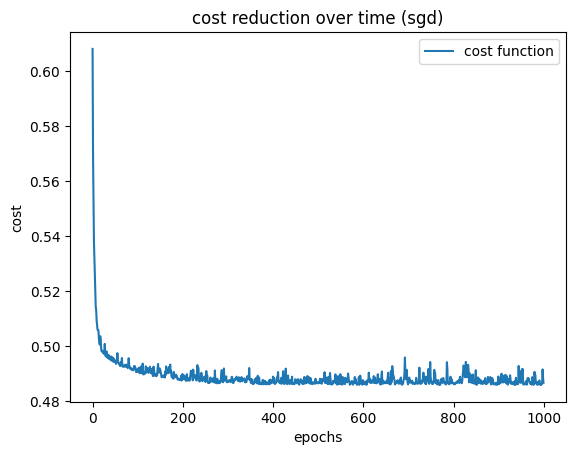

Final parameters: [-1.0198967  -0.26012305 -1.22013219  2.30414436 -2.13536643]


In [ ]:
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = df["Species"].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.c_[np.ones(X.shape[0]), X]
y = (y == 1).astype(int)
theta = np.zeros(X.shape[1])

def sigmoid(z):
    # clip values to avoid overflow
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    predictions = np.clip(predictions, 1e-7, 1 - 1e-7)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def stochastic_gradient_descent(X, y, theta, alpha=0.01, epochs=1000):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        for i in range(m):
            index = np.random.randint(0, m)
            xi = X[index, :].reshape(1, -1)
            yi = y[index]

            prediction = sigmoid(np.dot(xi, theta))
            gradient = np.dot(xi.T, (prediction - yi))
            theta -= alpha * gradient.flatten()

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"epoch {epoch}, cost: {cost:.4f}")

    return theta, cost_history

alpha = 0.01
epochs = 1000
theta, cost_history = stochastic_gradient_descent(X, y, theta, alpha, epochs)

plt.plot(range(epochs), cost_history, label="cost function")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("cost reduction over time (sgd)")
plt.legend()
plt.show()

print("Final parameters:", theta)

epoch 0, cost: 0.692256, cost change: inf
epoch 100, cost: 0.515817, cost change: 0.000261
epoch 200, cost: 0.503996, cost change: 0.000055
epoch 300, cost: 0.500307, cost change: 0.000026
epoch 400, cost: 0.498291, cost change: 0.000016
epoch 500, cost: 0.496956, cost change: 0.000011
epoch 600, cost: 0.495989, cost change: 0.000008
epoch 700, cost: 0.495243, cost change: 0.000007
epoch 800, cost: 0.494641, cost change: 0.000005
epoch 900, cost: 0.494134, cost change: 0.000005


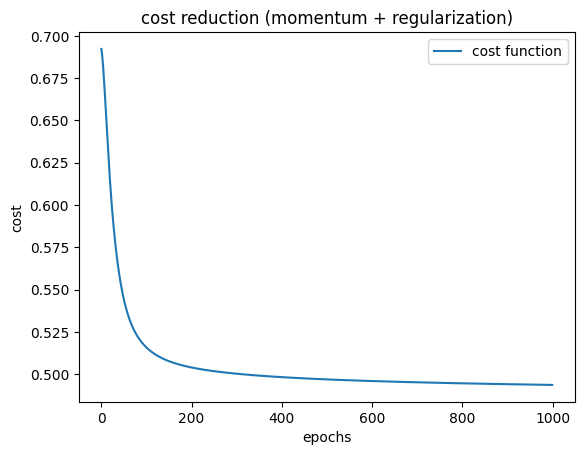

Final parameters: [-0.96190539  0.24449546 -1.39147054  0.66256163 -0.89818449]


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta, lambda_):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    predictions = np.clip(predictions, 1e-7, 1 - 1e-7)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    return cost + reg_term

def gradient_descent_momentum_reg(X, y, theta, alpha=0.01, beta=0.9, lambda_=0.1, tol=1e-6, epochs=1000):
    m = len(y)
    v = np.zeros_like(theta)
    cost_history = []
    prev_cost = float('inf')

    for epoch in range(epochs):
        predictions = sigmoid(np.dot(X, theta))

        gradient = (1/m) * np.dot(X.T, (predictions - y)) + (lambda_ / m) * np.r_[0, theta[1:]]

        v = beta * v + (1 - beta) * gradient
        theta -= alpha * v

        cost = compute_cost(X, y, theta, lambda_)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"epoch {epoch}, cost: {cost:.6f}, cost change: {abs(prev_cost - cost):.6f}")

        if abs(prev_cost - cost) < tol:
            print(f"converged at epoch {epoch} with cost change: {abs(prev_cost - cost):.6f}")
            break

        prev_cost = cost

    plt.plot(range(len(cost_history)), cost_history, label="cost function")
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.title("cost reduction (momentum + regularization)")
    plt.legend()
    plt.show()

    return theta

X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = (df["Species"] == 1).astype(int)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.c_[np.ones(X.shape[0]), X]
theta = np.zeros(X.shape[1])

alpha = 0.1
beta = 0.9
lambda_ = 0.1
tol = 1e-6
epochs = 1000

theta_final = gradient_descent_momentum_reg(X, y, theta, alpha, beta, lambda_, tol, epochs)

print("Final parameters:", theta_final)

iteration 0, cost: 0.505657, cost change: inf
iteration 1, cost: 0.489799, cost change: 0.015858
iteration 2, cost: 0.489021, cost change: 0.000778
iteration 3, cost: 0.489019, cost change: 0.000003
iteration 4, cost: 0.489019, cost change: 0.000000
converged at iteration 4 with cost change: 0.000000


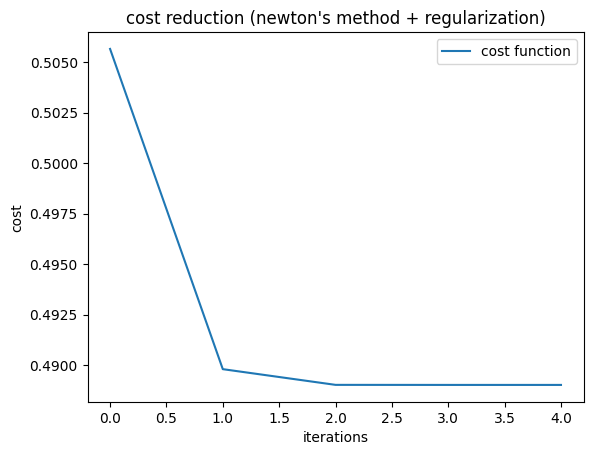

final model parameters: [-0.98581054 -0.0992178  -1.23552658  1.87956957 -1.76004579]


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta, lambda_):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    predictions = np.clip(predictions, 1e-7, 1 - 1e-7)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    return cost + reg_term

def newton_method_reg(X, y, theta, lambda_=0.1, tol=1e-6, max_iter=100):
    m, n = X.shape
    cost_history = []
    prev_cost = float('inf')

    for i in range(max_iter):
        predictions = sigmoid(np.dot(X, theta))

        gradient = (1/m) * np.dot(X.T, (predictions - y)) + (lambda_ / m) * np.r_[0, theta[1:]]

        R = np.diag(predictions * (1 - predictions))
        H = (1/m) * np.dot(X.T, np.dot(R, X)) + (lambda_ / m) * np.eye(n)
        H[0, 0] -= (lambda_ / m)

        theta -= np.linalg.inv(H).dot(gradient)

        cost = compute_cost(X, y, theta, lambda_)
        cost_history.append(cost)

        print(f"iteration {i}, cost: {cost:.6f}, cost change: {abs(prev_cost - cost):.6f}")

        if abs(prev_cost - cost) < tol:
            print(f"converged at iteration {i} with cost change: {abs(prev_cost - cost):.6f}")
            break

        prev_cost = cost

    plt.plot(range(len(cost_history)), cost_history, label="cost function")
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title("cost reduction (newton's method + regularization)")
    plt.legend()
    plt.show()

    return theta

X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = (df["Species"] == 1).astype(int)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.c_[np.ones(X.shape[0]), X]
theta = np.zeros(X.shape[1])

lambda_ = 0.1
tol = 1e-6
max_iter = 100

theta_final = newton_method_reg(X, y, theta, lambda_, tol, max_iter)

print("Final parameters:", theta_final)